In [211]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [212]:
train = pd.read_csv("C:/Users/Aravind/PROJECTS/Used-Car-Price-Prediction/Data/train.csv")
test = pd.read_csv("C:/Users/Aravind/PROJECTS/Used-Car-Price-Prediction/Data/test.csv")

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [214]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [215]:
for column in train.select_dtypes(include=['object']).columns:
    print(f"Value counts for column '{column}':")
    print(train[column].value_counts())
    print()

Value counts for column 'brand':
brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              50
McLaren        

In [216]:
import re

def parse_transmission(transmission_series):
    def parse_entry(entry):
        # Handle non-string entries
        if not isinstance(entry, str):
            return {
                'Speed': None,
                'Type': None,
                'Features': None,
            }
        
        # Initialize dictionary for parsed values
        parsed = {
            'Speed': None,
            'Type': None,
            'Features': None,
        }
        
        # Regex patterns
        speed_pattern = re.compile(r'(\d+)-Speed')
        type_pattern = re.compile(r'(A/T|M/T|Automatic|Manual|CVT|DCT)')
        features_pattern = re.compile(r'with (.+)|\((.+)\)|w/(.+)')
        
        # Find speed
        speed_match = speed_pattern.search(entry)
        if speed_match:
            parsed['Speed'] = int(speed_match.group(1))
        
        # Find type
        type_match = type_pattern.search(entry)
        if type_match:
            parsed['Type'] = type_match.group()
        else:
            # Attempt to categorize if type is not explicit
            if 'Automatic' in entry:
                parsed['Type'] = 'Automatic'
            elif 'Manual' in entry:
                parsed['Type'] = 'Manual'
            elif 'CVT' in entry:
                parsed['Type'] = 'CVT'
        
        # Find features
        features_match = features_pattern.search(entry)
        if features_match:
            features = features_match.groups()
            parsed['Features'] = ', '.join(filter(None, features))
        else:
            # Check for common features not captured by the regex
            if 'Dual Shift Mode' in entry:
                parsed['Features'] = 'Dual Shift Mode'
            elif 'Overdrive' in entry:
                parsed['Features'] = 'Overdrive'
            elif 'Auto-Shift' in entry:
                parsed['Features'] = 'Auto-Shift'
        
        return parsed

    # Apply the parsing function to each entry
    parsed_data = transmission_series.apply(parse_entry)
    
    # Convert the list of dictionaries to a DataFrame
    parsed_df = pd.DataFrame(parsed_data.tolist())
    
    # Return the parsed DataFrame
    return parsed_df

In [217]:
transmission_series = train['transmission']

In [218]:
train_parsed = parse_transmission(transmission_series)

In [219]:
transmission_series = test['transmission']
test_parsed = parse_transmission(transmission_series)

In [220]:
train_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Speed     29406 non-null  float64
 1   Type      47741 non-null  object 
 2   Features  6703 non-null   object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [221]:
train_parsed.head()

,Speed,Type,Features
0,10.0,A/T,None
1,6.0,M/T,None
2,6.0,A/T,None
3,NaN,None,Dual Shift Mode
4,NaN,A/T,None


In [222]:
train = pd.concat([train, train_parsed], axis=1)
test = pd.concat([test , test_parsed],axis=1)

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            54273 non-null  int64  
 1   brand         54273 non-null  object 
 2   model         54273 non-null  object 
 3   model_year    54273 non-null  int64  
 4   milage        54273 non-null  int64  
 5   fuel_type     54273 non-null  object 
 6   engine        54273 non-null  object 
 7   transmission  54273 non-null  object 
 8   ext_col       54273 non-null  object 
 9   int_col       54273 non-null  object 
 10  accident      54273 non-null  object 
 11  clean_title   54273 non-null  object 
 12  price         54273 non-null  int64  
 13  Speed         29406 non-null  float64
 14  Type          47741 non-null  object 
 15  Features      6703 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 6.6+ MB


In [224]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Speed,Type,Features
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,10.0,A/T,None
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,6.0,M/T,None
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,6.0,A/T,None
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,NaN,None,Dual Shift Mode
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,NaN,A/T,None


In [225]:
train = train.drop(['id','clean_title'],axis=1)
test = test.drop(['clean_title'],axis=1)

In [226]:
def parse_engine(engine_str):
    parts = engine_str.split()
    horsepower, displacement, cylinder, engine_type, fuel = (np.nan, np.nan, np.nan, np.nan, np.nan)
    
    try:
        # Parse horsepower
        if 'HP' in parts[0]:
            horsepower = parts[0].replace('HP', '')
            parts.pop(0)
        
        # Parse displacement
        if 'L' in parts[0]:
            displacement = parts[0].replace('L', '')
            parts.pop(0)
        elif 'Liter' in parts[0]:
            displacement = parts[0].replace('Liter', '')
            parts.pop(0)

        # Parse cylinder
        if parts[1] == 'Cylinder':
            cylinder = parts[0]
            parts.pop(0)
            parts.pop(0)
        
        # Parse engine type and fuel
        if len(parts) >= 2:
            engine_type = parts[0]
            fuel = parts[-2] if 'Fuel' in parts[-1] else parts[-1]
    except:
        pass
    
    return pd.Series([horsepower, displacement, cylinder, engine_type, fuel])

# Apply the function to the 'engine' column and create new columns
train[['horsepower', 'displacement', 'cylinder', 'type', 'fuel']] = train['engine'].apply(parse_engine)
test[['horsepower', 'displacement', 'cylinder', 'type', 'fuel']] = test['engine'].apply(parse_engine)

In [227]:
train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,Speed,Type,Features,horsepower,displacement,cylinder,type,fuel
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,11000,10.0,A/T,None,375.0,3.5,V6,Engine,Gasoline
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,8250,6.0,M/T,None,300.0,3.0,NaN,Straight,Gasoline
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,15000,6.0,A/T,None,300.0,4.2,8,Engine,Gasoline
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,63500,NaN,None,Dual Shift Mode,335.0,3.0,NaN,Straight,Hybrid
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,7850,NaN,A/T,None,200.0,3.8,V6,Engine,Gasoline


In [228]:
train = train.drop(['model','engine','transmission','ext_col','int_col','fuel','Features'],axis=1)
test = test.drop(['model','engine','transmission','ext_col','int_col','fuel','Features'],axis=1)

In [229]:
train.head()

,brand,model_year,milage,fuel_type,accident,price,Speed,Type,horsepower,displacement,cylinder,type
0,Ford,2018,74349,Gasoline,None reported,11000,10.0,A/T,375.0,3.5,V6,Engine
1,BMW,2007,80000,Gasoline,None reported,8250,6.0,M/T,300.0,3.0,NaN,Straight
2,Jaguar,2009,91491,Gasoline,None reported,15000,6.0,A/T,300.0,4.2,8,Engine
3,BMW,2022,2437,Hybrid,None reported,63500,NaN,None,335.0,3.0,NaN,Straight
4,Pontiac,2001,111000,Gasoline,None reported,7850,NaN,A/T,200.0,3.8,V6,Engine


In [230]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

def preprocess_data(df):
    # Selecting numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns
    df_numerical = df[numerical_columns]
    
    # Handling missing values for numerical columns using SimpleImputer with mean strategy
    imputer_numerical = SimpleImputer(strategy='mean')
    df_imputed_numerical = pd.DataFrame(imputer_numerical.fit_transform(df_numerical), columns=df_numerical.columns)
    
    # Selecting categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    df_categorical = df[categorical_columns]
    
    # Handling missing values for categorical columns using SimpleImputer with most frequent strategy
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    df_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(df_categorical), columns=df_categorical.columns)
    
    # Encoding categorical variables using OrdinalEncoder
    ordinal_encoder = OrdinalEncoder()
    df_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_imputed_categorical), columns=df_imputed_categorical.columns)
    
    # Merging with non-categorical columns
    df_processed = pd.concat([df_imputed_numerical, df_encoded], axis=1)
    
    return df_processed

# Assuming df is your DataFrame
# Replace 'df' with the name of your DataFrame
train_processed = preprocess_data(train)
test_processed = preprocess_data(test)


In [231]:
train_processed.corr()

,model_year,milage,price,Speed,brand,fuel_type,accident,Type,horsepower,displacement,cylinder,type
model_year,1.000000,-0.625226,0.216150,0.448775,-0.068357,-0.044165,0.216034,-0.023097,0.354473,-0.007374,0.027649,0.144609
milage,-0.625226,1.000000,-0.248927,-0.328502,0.047288,-0.084541,-0.295166,-0.093066,-0.375689,-0.015869,-0.000990,-0.133896
price,0.216150,-0.248927,1.000000,0.123561,-0.003448,0.001832,0.114705,0.026804,0.217910,0.106515,0.026621,0.069234
Speed,0.448775,-0.328502,0.123561,1.000000,-0.090910,0.021628,0.114962,-0.151630,0.217265,0.002830,0.077811,0.136923
brand,-0.068357,0.047288,-0.003448,-0.090910,1.000000,0.038529,-0.012365,-0.035163,-0.137618,-0.069335,-0.012140,-0.173850
fuel_type,-0.044165,-0.084541,0.001832,0.021628,0.038529,1.000000,0.031950,0.055226,-0.033140,-0.242826,-0.034446,0.033710
accident,0.216034,-0.295166,0.114705,0.114962,-0.012365,0.031950,1.000000,0.038484,0.178829,0.050284,0.034384,0.071904
Type,-0.023097,-0.093066,0.026804,-0.151630,-0.035163,0.055226,0.038484,1.000000,0.092432,-0.050422,-0.090361,0.045751
horsepower,0.354473,-0.375689,0.217910,0.217265,-0.137618,-0.033140,0.178829,0.092432,1.000000,0.612704,0.316586,-0.000216
displacement,-0.007374,-0.015869,0.106515,0.002830,-0.069335,-0.242826,0.050284,-0.050422,0.612704,1.000000,0.299603,-0.062684


In [232]:
train_processed.head()

,model_year,milage,price,Speed,brand,fuel_type,accident,Type,horsepower,displacement,cylinder,type
0,2018.0,74349.0,11000.0,10.000000,14.0,2.0,1.0,0.0,203.0,21.0,6.0,15.0
1,2007.0,80000.0,8250.0,6.000000,4.0,2.0,1.0,4.0,152.0,17.0,5.0,25.0
2,2009.0,91491.0,15000.0,6.000000,21.0,2.0,1.0,0.0,152.0,27.0,5.0,15.0
3,2022.0,2437.0,63500.0,7.107155,4.0,3.0,1.0,6.0,181.0,17.0,5.0,25.0
4,2001.0,111000.0,7850.0,7.107155,40.0,2.0,1.0,0.0,73.0,24.0,6.0,15.0


In [233]:
from scipy import stats

# Calculate the Z-scores of each column
z_scores = np.abs(stats.zscore(train_processed))

# Set a threshold for identifying outliers
threshold = 3

# Identify the indices of rows containing outliers
outliers = np.where(z_scores > threshold)
outlier_indices = set(outliers[0])

# Drop the rows with outliers
train_processed = train_processed.drop(outlier_indices).reset_index(drop=True)

In [234]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50144 entries, 0 to 50143
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_year    50144 non-null  float64
 1   milage        50144 non-null  float64
 2   price         50144 non-null  float64
 3   Speed         50144 non-null  float64
 4   brand         50144 non-null  float64
 5   fuel_type     50144 non-null  float64
 6   accident      50144 non-null  float64
 7   Type          50144 non-null  float64
 8   horsepower    50144 non-null  float64
 9   displacement  50144 non-null  float64
 10  cylinder      50144 non-null  float64
 11  type          50144 non-null  float64
dtypes: float64(12)
memory usage: 4.6 MB


In [235]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
import xgboost as xgb

# Split the data into features and target variable
X = train_processed.drop(columns='price')  # Features
y = train_processed['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_reg = xgb.XGBRegressor(random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 21533.086670496312


In [236]:
import statsmodels.api as sm

X = train_processed.drop(columns='price') 
y = train_processed['price']

X = sm.add_constant(X)

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42)

reg = sm.OLS(y_train , X_train).fit()

reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                   OLS                  Adj. R-squared:         0.403      
Dependent Variable:      price                AIC:                    862250.9256
Date:                    2024-06-12 15:52     BIC:                    862353.3453
No. Observations:        37608                Log-Likelihood:         -4.3111e+05
Df Model:                11                   F-statistic:            2308.      
Df Residuals:            37596                Prob (F-statistic):     0.00       
R-squared:               0.403                Scale:                  5.3039e+08 
---------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|      [0.025        0.975]   
---------------------------------------------------------------------------------
const        -2094581.4213 65140.9803 -32.1546 0.0000 -2222259.5071 -1966903.3356
model_year       1044.7986    32.3911  32.2558 0.0000      981.3112     1108.2860
milage             -0.1745     0.0035 -50.1384 0.0000       -0.1813       -0.1677
Speed             839.7952   130.1047   6.4548 0.0000      584.7866     1094.8039
brand             140.4349     8.3569  16.8046 0.0000      124.0551      156.8147
fuel_type        2397.3316   492.8062   4.8647 0.0000     1431.4181     3363.2450
accident         3495.8936   282.2011  12.3880 0.0000     2942.7718     4049.0154
Type              167.8904    58.5008   2.8699 0.0041       53.2272      282.5535
horsepower        133.7442     2.9255  45.7160 0.0000      128.0101      139.4784
displacement      -15.8274    16.1021  -0.9829 0.3256      -47.3879       15.7331
cylinder        -1111.9068   130.6853  -8.5083 0.0000    -1368.0536     -855.7600
type              226.2915    35.5660   6.3626 0.0000      156.5812      296.0017
---------------------------------------------------------------------------------
Omnibus:                 29952.628          Durbin-Watson:             1.995     
Prob(Omnibus):           0.000              Jarque-Bera (JB):          836584.284
Skew:                    3.687              Prob(JB):                  0.000     
Kurtosis:                24.898             Condition No.:             47271010  
=================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[2] The condition number is large, 4.73e+07. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [237]:
train_processed = train_processed.drop(['Type','displacement'],axis=1)
test_processed = test_processed.drop(['Type','displacement'],axis=1)

In [238]:
train_processed.head()

,model_year,milage,price,Speed,brand,fuel_type,accident,horsepower,cylinder,type
0,2018.0,74349.0,11000.0,10.000000,14.0,2.0,1.0,203.0,6.0,15.0
1,2007.0,80000.0,8250.0,6.000000,4.0,2.0,1.0,152.0,5.0,25.0
2,2009.0,91491.0,15000.0,6.000000,21.0,2.0,1.0,152.0,5.0,15.0
3,2022.0,2437.0,63500.0,7.107155,4.0,3.0,1.0,181.0,5.0,25.0
4,2001.0,111000.0,7850.0,7.107155,40.0,2.0,1.0,73.0,6.0,15.0


In [239]:
train_processed = train_processed.drop(['brand','type'],axis=1)
test_processed = test_processed.drop(['brand','type'],axis=1)

In [240]:
train_processed.head()

,model_year,milage,price,Speed,fuel_type,accident,horsepower,cylinder
0,2018.0,74349.0,11000.0,10.000000,2.0,1.0,203.0,6.0
1,2007.0,80000.0,8250.0,6.000000,2.0,1.0,152.0,5.0
2,2009.0,91491.0,15000.0,6.000000,2.0,1.0,152.0,5.0
3,2022.0,2437.0,63500.0,7.107155,3.0,1.0,181.0,5.0
4,2001.0,111000.0,7850.0,7.107155,2.0,1.0,73.0,6.0


In [241]:
X = train_processed.drop(columns='price')  
y = train_processed['price']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_reg = xgb.XGBRegressor(random_state=42)


xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 21473.78374451034


In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb

def evaluate_models(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Neural Network': MLPRegressor(max_iter=1000),
        'XGBoost': xgb.XGBRegressor(),
        'LightGBM': lgb.LGBMRegressor()
    }

     # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        print(f'{name}: RMSE = {rmse:.4f}, R² = {r2:.4f}')

X = train_processed.drop(columns='price') 
y = train_processed['price']
evaluate_models(X, y)

Linear Regression: RMSE = 22675.7508, R² = 0.3987
Decision Tree: RMSE = 29459.7037, R² = -0.0149
Random Forest: RMSE = 22512.1218, R² = 0.4073
Gradient Boosting: RMSE = 21387.7695, R² = 0.4651
AdaBoost: RMSE = 24290.7626, R² = 0.3100
K-Nearest Neighbors: RMSE = 22983.9546, R² = 0.3822
Neural Network: RMSE = 22368.0770, R² = 0.4149
XGBoost: RMSE = 21473.7837, R² = 0.4608
LightGBM: RMSE = 21121.5188, R² = 0.4783


In [243]:
model = lgb.LGBMRegressor()
X = train_processed.drop(columns='price') 
y = train_processed['price']
model.fit(X, y)

test = test_processed.drop(['id'],axis=1)
y_pred = model.predict(test)

result_df = pd.DataFrame({'id': test_processed['id'], 'price': y_pred})

# Save the result DataFrame to a CSV file
result_df.to_csv('C:/Users/Aravind/PROJECTS/Used-Car-Price-Prediction/Predictions/transmission-nb2.csv', index=False)

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

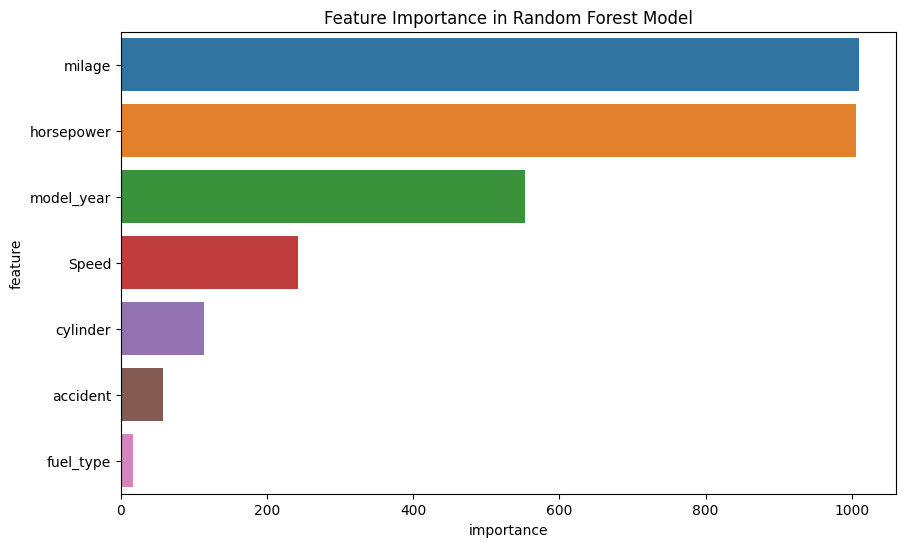

In [245]:
# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [246]:
train_processed.head()

,model_year,milage,price,Speed,fuel_type,accident,horsepower,cylinder
0,2018.0,74349.0,11000.0,10.000000,2.0,1.0,203.0,6.0
1,2007.0,80000.0,8250.0,6.000000,2.0,1.0,152.0,5.0
2,2009.0,91491.0,15000.0,6.000000,2.0,1.0,152.0,5.0
3,2022.0,2437.0,63500.0,7.107155,3.0,1.0,181.0,5.0
4,2001.0,111000.0,7850.0,7.107155,2.0,1.0,73.0,6.0


In [247]:
train_processed.corr()

,model_year,milage,price,Speed,fuel_type,accident,horsepower,cylinder
model_year,1.000000,-0.639171,0.499959,0.464978,0.131262,0.223252,0.373117,0.012368
milage,-0.639171,1.000000,-0.542105,-0.342615,-0.161408,-0.300705,-0.394823,-0.011597
price,0.499959,-0.542105,1.000000,0.282622,0.108728,0.232463,0.466286,0.093495
Speed,0.464978,-0.342615,0.282622,1.000000,0.095214,0.116473,0.235554,0.086194
fuel_type,0.131262,-0.161408,0.108728,0.095214,1.000000,0.061244,0.013720,-0.004770
accident,0.223252,-0.300705,0.232463,0.116473,0.061244,1.000000,0.181260,0.047877
horsepower,0.373117,-0.394823,0.466286,0.235554,0.013720,0.181260,1.000000,0.427205
cylinder,0.012368,-0.011597,0.093495,0.086194,-0.004770,0.047877,0.427205,1.000000


In [248]:
# train_processed = train_processed.drop(['fuel_type','cylinder','accident','Speed'],axis=1)
# test_processed = test_processed.drop(['fuel_type','cylinder','accident','Speed'],axis=1)

In [249]:
# model = lgb.LGBMRegressor()
# X = train_processed.drop(columns='price') 
# y = train_processed['price']
# model.fit(X, y)

# test = test_processed.drop(['id'],axis=1)
# y_pred = model.predict(test)

# result_df = pd.DataFrame({'id': test_processed['id'], 'price': y_pred})

# # Save the result DataFrame to a CSV file
# result_df.to_csv('C:/Users/Aravind/PROJECTS/Used-Car-Price-Prediction/Predictions/transmission-nb3.csv', index=False)

In [250]:
from sklearn.model_selection import GridSearchCV
lgbm = lgb.LGBMRegressor()

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

X = train_processed.drop(columns='price') 
y = train_processed['price']

# Fit the model
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(test)

result_df = pd.DataFrame({'id': test_processed['id'], 'price': y_pred})

# Save the result DataFrame to a CSV file
result_df.to_csv('better_predictions_nb.csv', index=False)

Best parameters found: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'num_leaves': 50}
